## Libraries and Data

In [604]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


sns.set()

In [605]:
gender = pd.read_csv('data/gender_submission.csv')
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

In [606]:
# Unify sources for easier data manipulation 
test['source'] = 'Test'
train['source'] = 'Train'

# Combine test and train data
data = pd.concat([test, train], axis=0, sort=False)

## Exploration

In [607]:
data.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source,Survived
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,1309,891.000000
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,2,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,Train,NaN
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,891,NaN
mean,655.000000,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,0.383838
std,378.020061,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,0.486592
min,1.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,328.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,655.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,982.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,1.000000


In [608]:
data.groupby('Ticket')['PassengerId'].count().sort_values(ascending=False).head(15)

Ticket
CA. 2343        11
1601             8
CA 2144          8
3101295          7
347077           7
347082           7
S.O.C. 14879     7
PC 17608         7
19950            6
113781           6
382652           6
347088           6
PC 17757         5
W./C. 6608       5
220845           5
Name: PassengerId, dtype: int64

In [609]:
data[data['Ticket']=='LINE']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source,Survived
179,180,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Train,0.0
271,272,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Train,1.0
302,303,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Train,0.0
597,598,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Train,0.0


In [610]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  source       1309 non-null   object 
 12  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


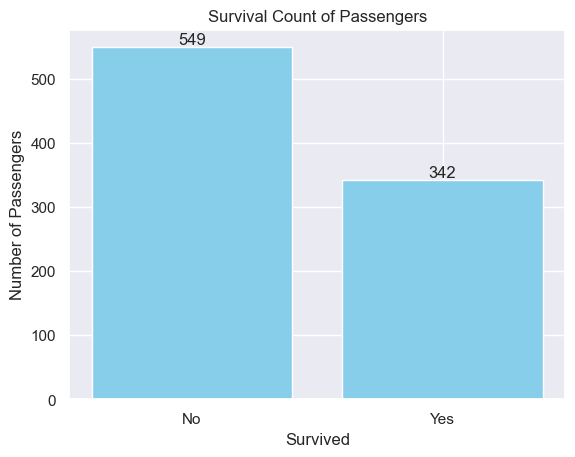

In [611]:
### Survivors Chart

surv = data.groupby('Survived')['PassengerId'].count().reset_index()

# Create the bar chart
plt.bar(surv['Survived'], surv['PassengerId'], color='skyblue')

# Set x-ticks to the distinct values of 'Survived' and label them as 'No' and 'Yes'
plt.xticks(surv['Survived'], labels=['No', 'Yes'])

# Annotate the bars with the values
for index, value in enumerate(surv['PassengerId']):
    plt.text(surv['Survived'][index], value, str(value), ha='center', va='bottom')

# Labels and title (optional)
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.title('Survival Count of Passengers')

# Show the plot
plt.show()

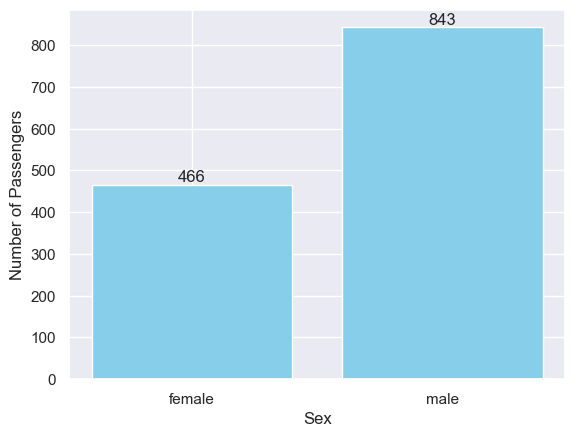

In [612]:
## Sex distribution

surv = data.groupby('Sex')['PassengerId'].count().reset_index()

# Create the bar chart
plt.bar(surv['Sex'], surv['PassengerId'], color='skyblue')

# X values
plt.xticks(surv['Sex'])

# Annotate the bars with the values
for index, value in enumerate(surv['PassengerId']):
    plt.text(surv['Sex'][index], value, str(value), ha='center', va='bottom')

# Labels and title (optional)
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')

# Show the plot
plt.show()

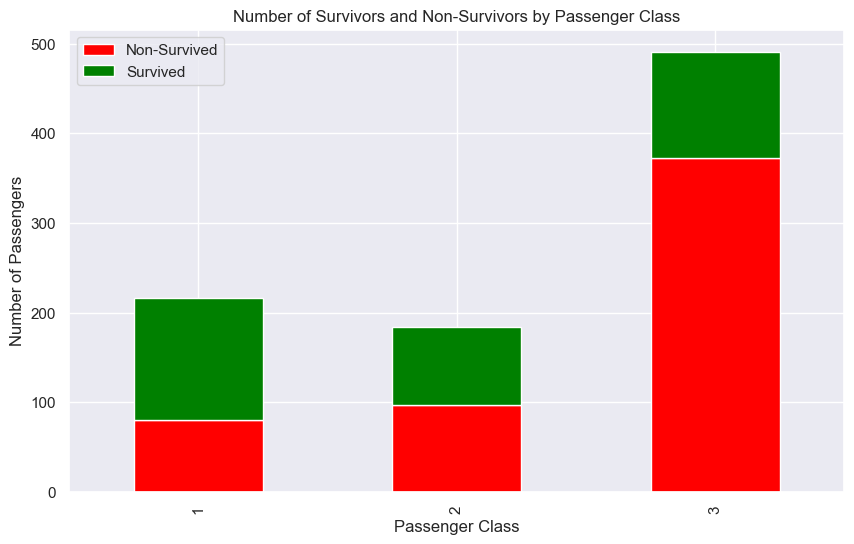

In [613]:
# Survivors by Class

# Group by Pclass and Survived, and count the number of occurrences
pclass_survival_counts = train.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

# Plot the bar chart
ax = pclass_survival_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])

# Set plot labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Number of Survivors and Non-Survivors by Passenger Class')
plt.legend(['Non-Survived', 'Survived'])

# Show the plot
plt.show()

/Users/ezequielrioskaliman/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


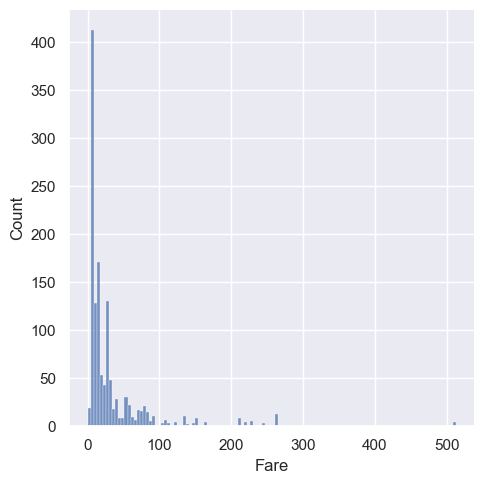

In [614]:
# Fare distribution
sns.displot(data['Fare'])

/Users/ezequielrioskaliman/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


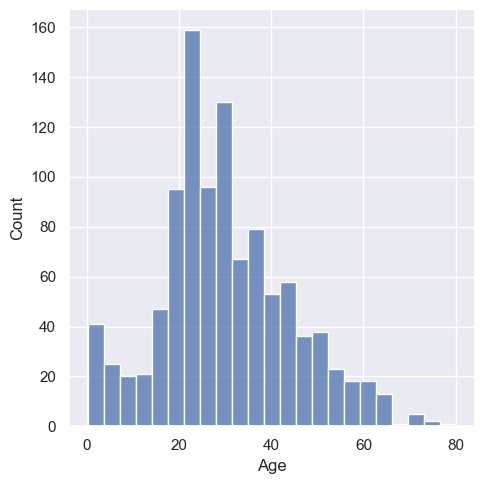

In [615]:
# Age distribution

sns.displot(data['Age'])

/var/folders/w3/vvsc11d1723ctsxm4jfwvb_c0000gn/T/ipykernel_93563/1080093972.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Parch'])
/Users/ezequielrioskaliman/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Parch', ylabel='Density'>

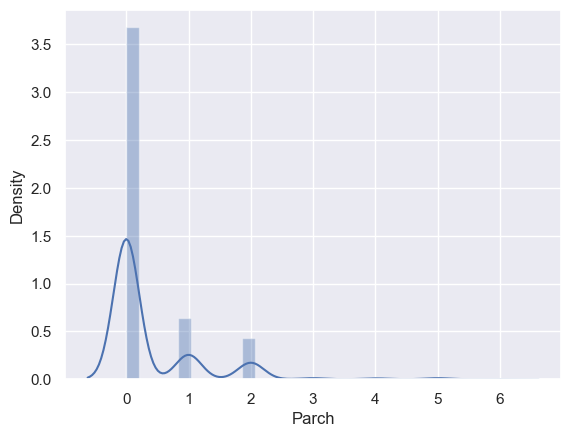

In [616]:
# Parch distribution 

sns.distplot(train['Parch'])

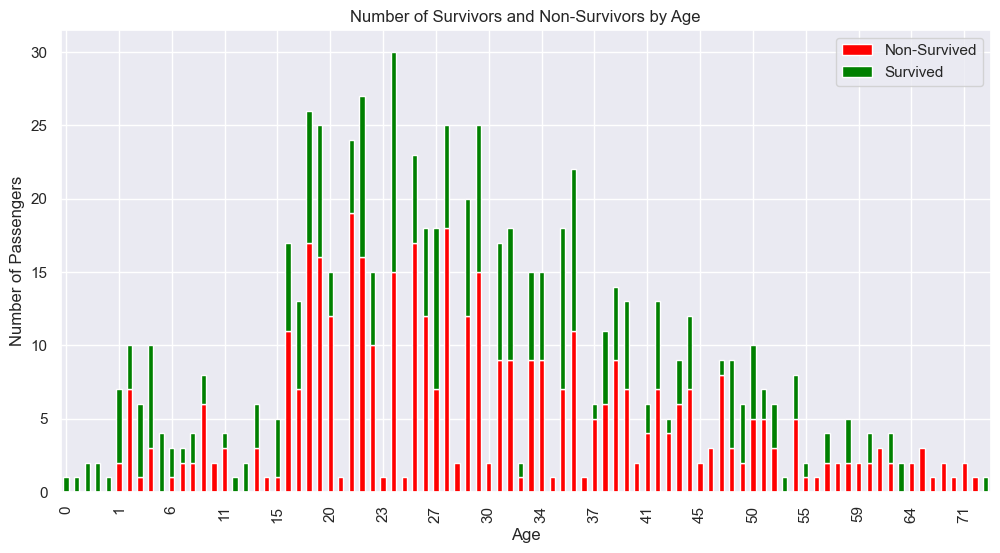

In [617]:
# Survivors by Age

# Group by Age and Survived, and count the number of occurrences
age_survival_counts = data.groupby(['Age', 'Survived']).size().unstack(fill_value=0)

# Plot the stacked bar chart
ax = age_survival_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green'])

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Number of Survivors and Non-Survivors by Age')
plt.legend(['Non-Survived', 'Survived'])

# Show fewer x-tick labels
tick_labels = age_survival_counts.index
tick_positions = range(0, len(tick_labels), 5)
plt.xticks(ticks=tick_positions, labels=[int(tick_labels[i]) for i in tick_positions])

# Show the plot
plt.show()

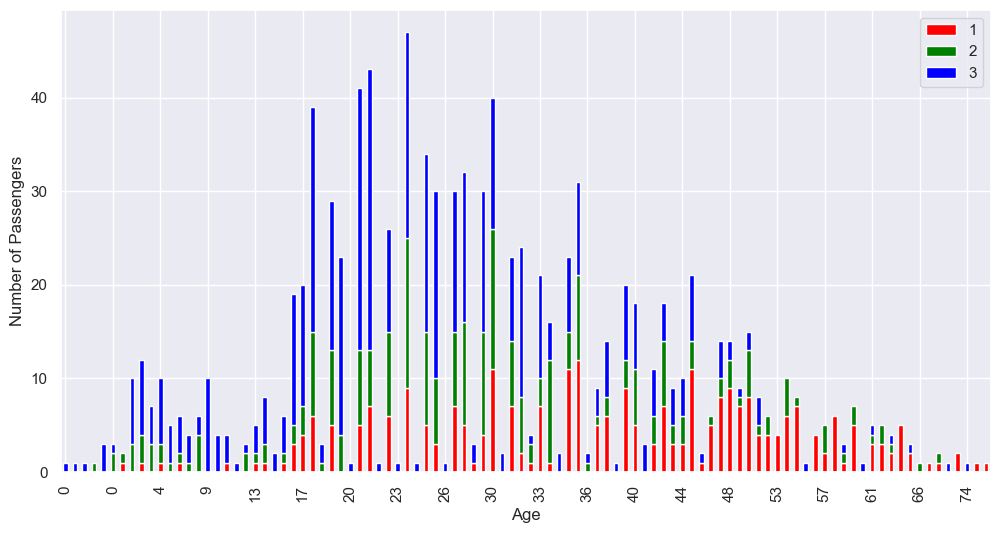

In [618]:
# Total class passengers by age to check if is any bias here on survivors

# Group by Age and Survived, and count the number of occurrences
age_survival_counts = data.groupby(['Age', 'Pclass']).size().unstack(fill_value=0)

# Plot the stacked bar chart
ax = age_survival_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green', 'blue'])

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()

# Show fewer x-tick labels
tick_labels = age_survival_counts.index
tick_positions = range(0, len(tick_labels), 5)
plt.xticks(ticks=tick_positions, labels=[int(tick_labels[i]) for i in tick_positions])

# Show the plot
plt.show()

In [619]:
data['Age'].sort_values().head(10)

354    0.17
201    0.33
803    0.42
755    0.67
281    0.75
644    0.75
469    0.75
307    0.83
831    0.83
78     0.83
Name: Age, dtype: float64

In [620]:
# Confirm if <= 6 have a better survive rate
(data[(data['Age']<7)].groupby('Survived').count()/data[(data['Age']<7)].count())['Age']

Survived
0.0    0.225806
1.0    0.532258
Name: Age, dtype: float64

/Users/ezequielrioskaliman/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


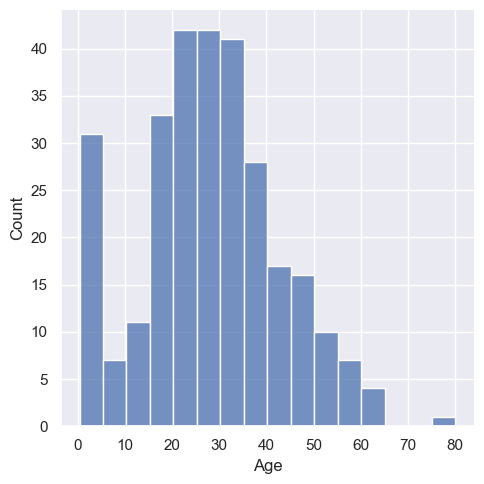

In [621]:
# Survivors distribution by age

sns.displot(data[data['Survived']==1]['Age'])

## Cleaning

In [622]:
# Drop columns not useful or columns with most of the values null

data_clean = data.copy()
data_clean.drop(columns=['PassengerId','Ticket','Cabin'],inplace=True)

In [623]:
# Fix data types

data_clean['Survived'] = data_clean['Survived'].astype(str)
data_clean['Pclass'] = data_clean['Pclass'].astype(str)

In [624]:
# Replace null values in Age with the mean age for each Pclass
data_clean['Age'] = data_clean.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

# Alternatively, you can use the following more explicit approach:
# Calculate mean age for each Pclass
mean_age_by_pclass = data_clean.groupby('Pclass')['Age'].mean()

# Define a function to fill age based on Pclass
def fill_age(row):
    if pd.isnull(row['Age']):
        return mean_age_by_pclass[row['Pclass']]
    return row['Age']

# Apply the function to fill missing ages
data_clean['Age'] = data_clean.apply(fill_age, axis=1)


# Replace null values in Fare with the mean age for each Pclass
data_clean['Fare'] = data_clean.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.mean()))

# Alternatively, you can use the following more explicit approach:
# Calculate mean age for each Pclass
mean_fare_by_pclass = data_clean.groupby('Pclass')['Fare'].mean()

# Define a function to fill age based on Pclass
def fill_fare(row):
    if pd.isnull(row['Fare']):
        return mean_fare_by_pclass[row['Pclass']]
    return row['Age']

# Apply the function to fill missing ages
data_clean['Fare'] = data_clean.apply(fill_fare, axis=1)

In [625]:
# Delete outliers for Fare column

mean_fare = data_clean['Fare'].mean()
std_fare = data_clean['Fare'].std()

data_clean['fare_norm'] = (np.abs(data_clean['Fare'] - mean_fare)) / std_fare



In [626]:
# Delete outliers for Age column

mean_age = data_clean['Age'].mean()
std_age = data_clean['Age'].std()

data_clean['age_norm'] = (np.abs(data_clean['Age'] - mean_age)) / std_age


In [627]:
# Fill embarked null values with the most common value

# Find the most common value (mode) in the Embarked column
most_common_embarked = data_clean['Embarked'].mode()[0]

# Fill null values with the most common value
data_clean['Embarked'].fillna(most_common_embarked, inplace=True)


/var/folders/w3/vvsc11d1723ctsxm4jfwvb_c0000gn/T/ipykernel_93563/852931017.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_clean['Embarked'].fillna(most_common_embarked, inplace=True)


In [628]:
data_clean.describe(include='all')

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,source,Survived,fare_norm,age_norm
count,1309,1309,1309,1309.000000,1309.000000,1309.000000,1309.000000,1309,1309,1309,1309.000000,1309.000000
unique,3,1307,2,NaN,NaN,NaN,NaN,3,2,3,NaN,NaN
top,3,"Kelly, Mr. James",male,NaN,NaN,NaN,NaN,S,Train,0.0,NaN,NaN
freq,709,2,843,NaN,NaN,NaN,NaN,916,891,549,NaN,NaN
mean,NaN,NaN,NaN,29.348219,0.498854,0.385027,29.348219,NaN,NaN,NaN,0.759946,0.759946
std,NaN,NaN,NaN,13.127850,1.041658,0.865560,13.127850,NaN,NaN,NaN,0.649646,0.649646
min,NaN,NaN,NaN,0.170000,0.000000,0.000000,0.170000,NaN,NaN,NaN,0.012072,0.012072
25%,NaN,NaN,NaN,22.000000,0.000000,0.000000,22.000000,NaN,NaN,NaN,0.345209,0.345209
50%,NaN,NaN,NaN,26.000000,0.000000,0.000000,26.000000,NaN,NaN,NaN,0.559743,0.559743
75%,NaN,NaN,NaN,37.000000,1.000000,0.000000,37.000000,NaN,NaN,NaN,1.016786,1.016786


In [629]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     1309 non-null   object 
 1   Name       1309 non-null   object 
 2   Sex        1309 non-null   object 
 3   Age        1309 non-null   float64
 4   SibSp      1309 non-null   int64  
 5   Parch      1309 non-null   int64  
 6   Fare       1309 non-null   float64
 7   Embarked   1309 non-null   object 
 8   source     1309 non-null   object 
 9   Survived   1309 non-null   object 
 10  fare_norm  1309 non-null   float64
 11  age_norm   1309 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 132.9+ KB


## Feature Engineering

In [630]:
# Create a new column with all the familiars travelling
data_clean['familiars'] = data_clean['SibSp'] + data_clean['Parch']

# Drop parch given that we saw that in the results have not enough power
data_clean.drop(columns='Parch',inplace=True)

In [631]:
data_clean['Age < 7'] = data_clean['Age'] < 7 

In [632]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     1309 non-null   object 
 1   Name       1309 non-null   object 
 2   Sex        1309 non-null   object 
 3   Age        1309 non-null   float64
 4   SibSp      1309 non-null   int64  
 5   Fare       1309 non-null   float64
 6   Embarked   1309 non-null   object 
 7   source     1309 non-null   object 
 8   Survived   1309 non-null   object 
 9   fare_norm  1309 non-null   float64
 10  age_norm   1309 non-null   float64
 11  familiars  1309 non-null   int64  
 12  Age < 7    1309 non-null   bool   
dtypes: bool(1), float64(4), int64(2), object(6)
memory usage: 134.2+ KB


In [633]:
# Create a column with the titles

# Step 1: Extract titles
data_clean['Title'] = data_clean['Name'].str.extract(r',\s*([^.]+)\.', expand=False)

# Step 2: Get the 4 most common titles
top_4_titles = data_clean['Title'].value_counts().nlargest(4).index.tolist()

# Step 3: Create a new column 'Title_Main' with the top 4 titles and 'Other'
data_clean['Title_Main'] = data_clean['Title'].apply(lambda x: x if x in top_4_titles else 'Other')

# Drop name column
data_clean.drop(columns=['Name','Title'],inplace=True)

## Feature Standarization

In [634]:
#### After test both models I decided that works better with the non-standarized metrics
scaler = StandardScaler()
scaler.fit(data_clean[['Age','Fare']])

StandardScaler()

In [635]:
inputs_scaled = scaler.transform(x_train[['Age','Fare']])
scaled_data = data_clean.copy()
scaled_data [['Age','Fare']] = scaler.transform(data_clean[['Age','Fare']])

In [636]:
scaled_data

,Pclass,Sex,Age,SibSp,Fare,Embarked,source,Survived,fare_norm,age_norm,familiars,Age < 7,Title_Main
0,3,male,0.392581,0,0.392581,Q,Test,nan,0.392431,0.392431,0,False,Mr
1,3,female,1.345120,1,1.345120,S,Test,nan,1.344606,1.344606,1,False,Mrs
2,2,male,2.488165,0,2.488165,Q,Test,nan,2.487215,2.487215,0,False,Mr
3,3,male,-0.178941,0,-0.178941,S,Test,nan,0.178873,0.178873,0,False,Mr
4,3,female,-0.559957,1,-0.559957,S,Test,nan,0.559743,0.559743,2,False,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,-0.178941,0,-0.178941,S,Train,0.0,0.178873,0.178873,0,False,Other
887,1,female,-0.788566,0,-0.788566,S,Train,1.0,0.788265,0.788265,0,False,Miss
888,3,female,-0.345341,1,-0.345341,S,Train,0.0,0.345209,0.345209,3,False,Miss
889,1,male,-0.255145,0,-0.255145,C,Train,1.0,0.255047,0.255047,0,False,Mr


## Split data in train and test and also get the dependan and independant variables

In [637]:
train = scaled_data[scaled_data['source']=='Train']
test = scaled_data[scaled_data['source']=='Test']

In [638]:
# Delete outliers from train data

train = train[train['age_norm']<3]
train.drop(columns='age_norm',inplace=True)
test.drop(columns='age_norm',inplace=True)


train = train[train['fare_norm']<3]
train.drop(columns='fare_norm',inplace=True)
test.drop(columns='fare_norm',inplace=True)


/var/folders/w3/vvsc11d1723ctsxm4jfwvb_c0000gn/T/ipykernel_93563/3663468164.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns='age_norm',inplace=True)
/var/folders/w3/vvsc11d1723ctsxm4jfwvb_c0000gn/T/ipykernel_93563/3663468164.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns='fare_norm',inplace=True)


In [639]:
y_train = train['Survived']
x_train = train.drop(columns='Survived')

x_test = test.drop(columns='Survived')

## Create Dummies

In [649]:
# Create Dummies

x_train_dummies = pd.get_dummies(x_train, drop_first=True)
x_test_dummies = pd.get_dummies(x_test, drop_first=True)


## Create Model

In [650]:
reg = LogisticRegression()
reg.fit(x_train_dummies,y_train)

LogisticRegression()

In [651]:
# Get the predictions and store them in the 'predicted' column
train_y_pred = reg.predict(x_train_dummies)

train_results = pd.DataFrame(y_train)
train_results['predicted'] = train_y_pred
train_results['ok'] = train_results['Survived'] == train_results['predicted']

In [652]:
train_y_pred = reg.predict(x_train_dummies)

<Figure size 1000x800 with 0 Axes>

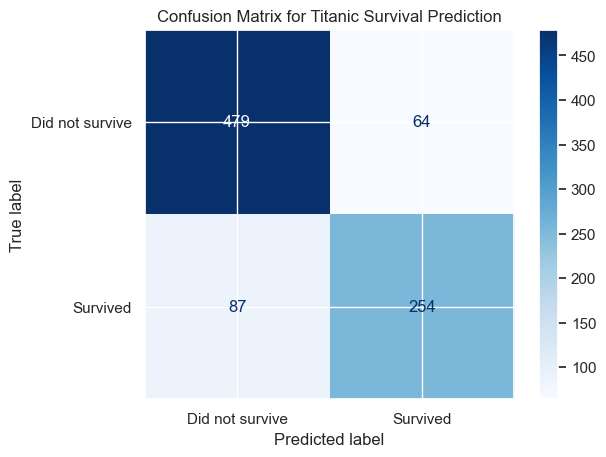

Accuracy: 0.8292
Precision: 0.7987
Recall: 0.7449
F1 Score: 0.7709


In [653]:
# Create the confusion matrix
cm = confusion_matrix(y_train, train_y_pred)

# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not survive', 'Survived'])

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Titanic Survival Prediction')
plt.show()

# Calculate and print additional metrics
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

In [654]:
# check variables weight

reg_summary = pd.DataFrame(x_train_dummies.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_[0]
reg_summary

,Features,Weights
0,Age,-0.185523
1,SibSp,-0.176127
2,Fare,-0.185523
3,familiars,-0.293150
4,Age < 7,0.882442
5,Pclass_2,-1.089314
6,Pclass_3,-2.190186
7,Sex_male,-1.138897
8,Embarked_Q,-0.126575
9,Embarked_S,-0.496193


# Validation with test df

## Predict Results

In [655]:
#Save the test predictions and add them to the dataset
x_test_dummies['Pred_surv'] = reg.predict(x_test_dummies)
x_test_dummies['Pred_surv'] = x_test_dummies['Pred_surv'].astype(float).astype(int)

gender['Predicted'] = x_test_dummies['Pred_surv']
gender['ok'] = gender['Survived'] == gender['Predicted']

<Figure size 1000x800 with 0 Axes>

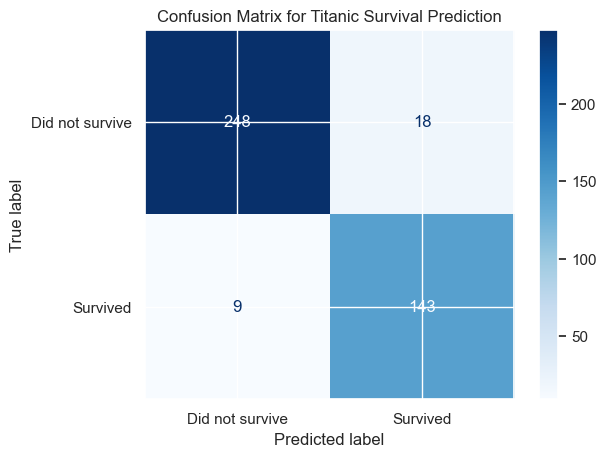

Accuracy: 0.9354
Precision: 0.8882
Recall: 0.9408
F1 Score: 0.9137


In [656]:
#Create a Variable with survived values
y_test = gender['Survived']
y_test_pred = x_test_dummies['Pred_surv']

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not survive', 'Survived'])

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Titanic Survival Prediction')
plt.show()

# Calculate and print additional metrics
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

In [659]:
df = pd.DataFrame(gender['PassengerId'])
df['Survived'] = y_test_pred
df.to_csv('submission.csv',index=False)

In [660]:
mistake = gender[(gender['ok']==False)&(gender['Survived']==0)]
test.iloc[mistake.index]

,Pclass,Sex,Age,SibSp,Fare,Embarked,source,Survived,familiars,Age < 7,Title_Main
23,1,male,-0.636160,0,-0.636160,C,Test,nan,1,False,Mr
64,1,male,-1.245784,2,-1.245784,C,Test,nan,4,False,Master
68,1,male,0.125871,0,0.125871,C,Test,nan,0,False,Mr
73,1,male,-0.064637,0,-0.064637,C,Test,nan,0,False,Mr
75,1,male,0.240175,0,0.240175,C,Test,nan,0,False,Mr
80,3,male,-1.779205,1,-1.779205,C,Test,nan,2,True,Master
89,2,male,-2.084018,1,-2.084018,S,Test,nan,2,True,Master
94,1,male,-0.331348,0,-0.331348,C,Test,nan,0,False,Mr
118,1,male,0.506886,0,0.506886,C,Test,nan,0,False,Mr
131,1,male,1.802338,0,1.802338,C,Test,nan,0,False,Other


In [661]:
gender

,PassengerId,Survived,Predicted,ok
0,892,0,0,True
1,893,1,1,True
2,894,0,0,True
3,895,0,0,True
4,896,1,1,True
...,...,...,...,...
413,1305,0,0,True
414,1306,1,1,True
415,1307,0,0,True
416,1308,0,0,True
